## sales analysis using pandas

In [ ]:
### Importing necessary library

In [1]:
import pandas as pd
from glob import glob  #uses wildcard * to read files in a dir, an alternative to using os
import os

## Task #1 Merge the 12 months of sales data files into a single csv

In [11]:
#df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

file_names = [file for file in os.listdir('./Sales_Data')] #returns a list of file names in the dir

all_months_data = pd.DataFrame()  #empty data frame
for file in file_names:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

# saving the output as a csv into the curdir  
all_months_data.to_csv("all_data.csv", index=False)  #without saving the index

### we read in our merged datafile to work with

In [57]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean Up our data

### Drop rows of NAN

In [58]:
#Drop rows of NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' literal in Month and delete it


In [59]:
#find the rows whose Date Order had string 'Or' and we drop those rows
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

#filter out those rows from our working data_set
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## What was the best month for sales? How much was earned that month?

### Augment the data with additional columns to suit our questions

### Task 2: Add Month Column

In [60]:
# take the first two characters of date to get the month
all_data['Month'] = all_data['Order Date'].str[0:2]

# change Month from string to numeric data type so as to allow calculations
all_data['Month'] = all_data['Month'].astype('int32')

all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


### Task 3: Add a Sales column

In [61]:
#turn the operation columns from string to float type to allow for calc
# or use pd.to_numeric(parse column name)
all_data['Sales'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a City Column

In [79]:
# grabbing the city name out of the Address Column, split on comma
# let's use apply() for each of the cell content
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:  get_city(x) +' {'+get_state(x) + '}') #apply(lambda x:  x.split(',')[1])
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas {TX}
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston {MA}
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles {CA}
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA}
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA}


### Question 1: What was the best month for sales? How much was earned that month?

In [88]:
results = all_data.groupby(['Month']).sum()
results

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


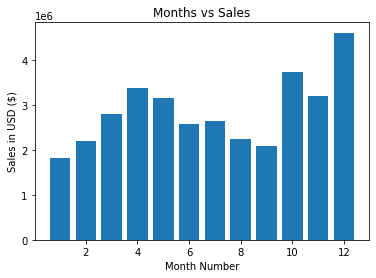

In [89]:
# we can visualise the above data
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.title('Months vs Sales')
plt.show()

### Question 2: Which City had the highest number of sales?

In [91]:
results2 = all_data.groupby(['City']).sum()
results2

,Month,Sales
City,,
Atlanta {GA},104794,2.795499e+06
Austin {TX},69829,1.819582e+06
Boston {MA},141112,3.661642e+06
Dallas {TX},104620,2.767975e+06
Los Angeles {CA},208325,5.452571e+06
New York City {NY},175741,4.664317e+06
Portland {ME},17144,4.497583e+05
Portland {OR},70621,1.870732e+06
San Francisco {CA},315520,8.262204e+06


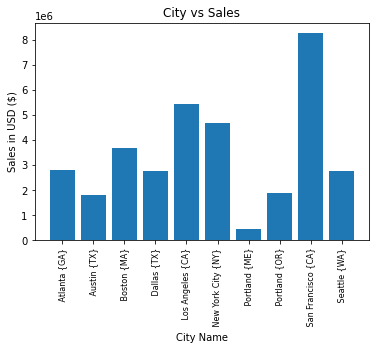

In [94]:
# we can visualise the above data
import matplotlib.pyplot as plt

#pick uniques values for city column in the same order as the city groupby results2
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.title('City vs Sales')
plt.show()

### 3:What time should we display advertisements to maximise likelihood of customer's buying product?

In [97]:
#lets convert the Order Date into python date format to ultilize date inbuilt functions
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas {TX}
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston {MA}
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles {CA}
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA}
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA}


In [100]:
# extract Hour and Minute from Order Date into new columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas {TX},8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston {MA},22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles {CA},14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA},14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA},9,27


### visualization of our results

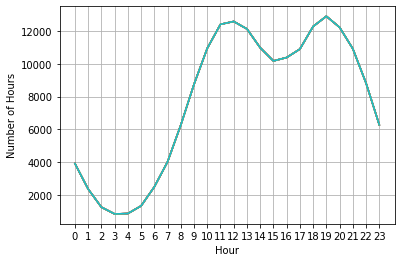

In [109]:
hours = [hour for hour, df in all_data.groupby('Hour')]

#draw a line plot
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Hours')
plt.grid()   #adding a grid to the figure
plt.show()

### Question 4: What products are most often sold together?

In [115]:
# create a new df and stored duplicated
df = all_data[all_data['Order ID'].duplicated(keep=False)]  #we keep all dups and group them

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# we then drop duplicate order Id from our results
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

<ipython-input-115-425909a43f06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


### counting pairs of items that occur together in Orders

In [118]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [125]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas {TX},8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston {MA},22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles {CA},14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA},14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles {CA},9,27


### Code below has failed to execute
I will record it as issue in GitHub then take off time to research about why groupby on product returns does not return numeric colums esp 'Quantity Ordered' so I have not solved question 5 fully.

In [ ]:
# we sum up the quantity ordered based on the Product
#product_group = all_data.groupby('Product')
#quantity_ordered = product_group.sum()['Quantity Ordered']
